In [8]:
#linear regression on the bank churn data
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [16]:
df=pd.read_csv("C:/Users/user/Downloads/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [12]:
data.shape

(10000, 14)

In [7]:
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [52]:
data = pd.read_csv("C:/Users/user/Downloads/Churn_Modelling.csv")
data = data[["EstimatedSalary", "Balance"]]
data.head()



,EstimatedSalary,Balance
0,101348.88,0.00
1,112542.58,83807.86
2,113931.57,159660.80
3,93826.63,0.00
4,79084.10,125510.82


In [56]:
returns=np.log(data).diff().dropna()
returns.head()

,EstimatedSalary,Balance
1,0.104763,inf
2,0.012266,0.644525
3,-0.194149,-inf
4,-0.170937,inf
5,0.638500,-0.098338


In [57]:
returns.corr()

,EstimatedSalary,Balance
EstimatedSalary,1.000000,-0.006341
Balance,-0.006341,1.000000


In [58]:
sample=returns.sample(100).corr()
sample

,EstimatedSalary,Balance
EstimatedSalary,1.000000,-0.130786
Balance,-0.130786,1.000000


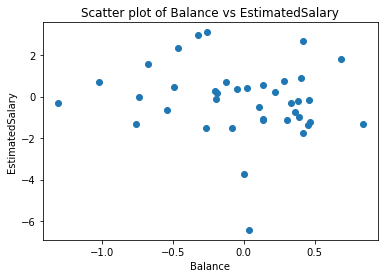

In [61]:
import matplotlib.pyplot as plt
sample = returns.sample(100)
plt.scatter(x=sample['Balance'], y=sample['EstimatedSalary'])
plt.xlabel("Balance")
plt.ylabel("EstimatedSalary")
plt.title("Scatter plot of Balance vs EstimatedSalary")
plt.show()



In [66]:
reg=np.polyfit(sample['EstimatedSalary'],sample['Balance'],deg=1)
reg

array([nan, nan])

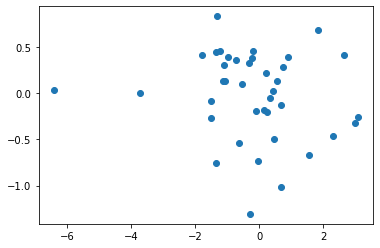

In [70]:
trend=np.polyval(reg,sample['EstimatedSalary'])
plt.scatter(sample['EstimatedSalary'],sample['Balance'])
plt.plot(sample['EstimatedSalary'],trend,'r');

In [73]:
#R squared
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the data
data = pd.read_csv("C:/Users/user/Downloads/Churn_Modelling.csv")

# Select the features and target
X = data[["EstimatedSalary", "Balance"]]
y = data["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the random forest regression model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



R-squared: -0.21192936120756678


In [75]:
from sklearn.metrics import r2_score
y_test_mean = np.full(len(y_test), y_test.mean())
r2_score(y_test, y_test_mean)


0.0

In [76]:
y_test_mean

array([0.1965, 0.1965, 0.1965, ..., 0.1965, 0.1965, 0.1965])

In [77]:
r2_score(y_test,y_test)

1.0

In [82]:
#mean absolute error
# Split the data into features (x) and target (y) variables
x = data[["EstimatedSalary", "Balance"]]
y = data["Exited"]

# Split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_preds = model.predict(x_test)

# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)

print("Mean Absolute Error:", mae)



Mean Absolute Error: 0.318565


In [86]:
df = pd.DataFrame({"actual values": y_test, "predicted values": y_preds})

In [87]:
df

,actual values,predicted values
9394,0,0.11
898,1,0.01
2398,0,0.24
5906,0,0.15
2343,0,0.07
...,...,...
1037,0,0.03
2899,0,0.09
9549,0,0.44
2740,0,0.26


In [88]:
df["difference"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,difference
9394,0,0.11,0.11
898,1,0.01,-0.99
2398,0,0.24,0.24
5906,0,0.15,0.15
2343,0,0.07,0.07
...,...,...,...
1037,0,0.03,0.03
2899,0,0.09,0.09
9549,0,0.44,0.44
2740,0,0.26,0.26


In [89]:
#RMSE
# Split the data into features (x) and target (y) variables
x = data[["EstimatedSalary", "Balance"]]
y = data["Exited"]

# Split the data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_preds = model.predict(x_test)

# Calculate the root mean squared error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_preds))

print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 0.44467117064185757
